In [21]:
# Choose the environment scvi-ev

In [ ]:
import scanpy as sc
import numpy as np
import torch
from torch.utils.data import Dataset

# Load AnnData
file_input="input_files.h5ad"
adata = sc.read_h5ad(file_input)

In [25]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,ident,age,region,species,project,percent.mt,percent.ribo,...,majorclass_manual_pre_v2,harmony_clusters_dims200,harmony_clusters_dims100,harmony_clusters_dims30,harmony_clusters_dims20,majorclass_manual.v2,majorclass_manual_pre_v3,majorclass_manual_pre_v4,majorclass_manual.tmp,majorclass_manual_tmp
AAACCCAAGCACCGTC-1_1_1,L76_POC10wksFoveaS1,3000.0,1442,L76_POC10wksFoveaS1,10wks,fovea,human,HumanDev,0.499307,4.271845,...,PRPC,57.0,35.0,1.0,1.0,PRPC,PRPC,PRPC,PRPC,PRPC
AAACCCACACCTCGTT-1_1_1,L76_POC10wksFoveaS1,3000.0,1564,L76_POC10wksFoveaS1,10wks,fovea,human,HumanDev,1.689579,7.702802,...,Cone,23.0,17.0,18.0,36.0,Cone,Cone,Cone,Cone,Cone
AAACCCACAGTTTCAG-1_1_1,L76_POC10wksFoveaS1,3000.0,1550,L76_POC10wksFoveaS1,10wks,fovea,human,HumanDev,0.901352,6.619930,...,RGC,15.0,12.0,15.0,3.0,AC,NRPC,AC,AC,AC
AAACCCAGTATCGTTG-1_1_1,L76_POC10wksFoveaS1,3000.0,1824,L76_POC10wksFoveaS1,10wks,fovea,human,HumanDev,2.376389,10.035774,...,PRPC,59.0,6.0,79.0,8.0,PRPC,PRPC,PRPC,PRPC,PRPC
AAACCCAGTCAGGTAG-1_1_1,L76_POC10wksFoveaS1,3000.0,1576,L76_POC10wksFoveaS1,10wks,fovea,human,HumanDev,2.840284,4.530453,...,Cone,12.0,17.0,29.0,20.0,Cone,Cone,Cone,Cone,Cone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGCACTCCCTA-1_1_15,S12_POC22wks_HumanF,3000.0,1193,S12_POC22wks_HumanF,22wks,fovea,human,HumanDev,2.263037,1.443096,...,BC,39.0,39.0,49.0,26.0,BC,BC,BC,BC,BC
TTTGTTGGTACAGAGC-1_1_15,S12_POC22wks_HumanF,3000.0,828,S12_POC22wks_HumanF,22wks,fovea,human,HumanDev,6.509299,5.937053,...,BC,39.0,39.0,49.0,26.0,BC,BC,BC,BC,BC
TTTGTTGGTCCTGTCT-1_1_15,S12_POC22wks_HumanF,3000.0,1228,S12_POC22wks_HumanF,22wks,fovea,human,HumanDev,0.406835,2.956333,...,MG,1.0,1.0,9.0,1.0,PRPC,MG,MG,MG,MG
TTTGTTGGTTAGGGAC-1_1_15,S12_POC22wks_HumanF,3000.0,843,S12_POC22wks_HumanF,22wks,fovea,human,HumanDev,2.075877,2.576951,...,AC,64.0,62.0,65.0,58.0,AC,AC,AC,AC,AC


In [26]:

# Normalize & Log-transform gene counts if not already
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Optional: Select top variable genes
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
adata = adata[:, adata.var.highly_variable]

# Encode categorical labels
from sklearn.preprocessing import LabelEncoder

cell_type_encoder = LabelEncoder()
age_encoder = LabelEncoder()

adata.obs['cell_type_encoded'] = cell_type_encoder.fit_transform(adata.obs['majorclass_manual'])
adata.obs['age_class'] = age_encoder.fit_transform(adata.obs['age'])


/var/folders/gl/wjgb7v7903b4mc47_xv41vtm0000gn/T/ipykernel_8296/7103806.py:15: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['cell_type_encoded'] = cell_type_encoder.fit_transform(adata.obs['majorclass_manual'])


In [28]:
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
import torch
import numpy as np

# Split AnnData into train/test
# adata_train, adata_test = adata[:int(len(adata)*0.6)], adata[int(len(adata)*0.6):]


# Get total number of cells
n_cells = len(adata)

# Generate shuffled indices
indices = np.random.permutation(n_cells)

# Calculate split point (60% train, 40% test)
split_idx = int(n_cells * 0.3)

# Split indices
train_idx = indices[:split_idx]
# test_idx = indices[split_idx:]

# Subset the AnnData object
adata_train = adata[train_idx].copy()
# adata_test = adata[test_idx].copy()
adata_test = adata.copy()


train_dataset = AnnDataset(adata_train)
test_dataset = AnnDataset(adata_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Hyperparameters
input_dim = adata.shape[1]
n_cell_types = len(cell_type_encoder.classes_)
n_classes = len(age_encoder.classes_)
latent_dim = 32

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# For MacBooks with Apple Silicon (M1/M2 chips)
device = torch.device(
    'mps' if torch.backends.mps.is_available() else 
    'cuda' if torch.cuda.is_available() else 
    'cpu'
)

# Verify device
print(f"Using device: {device}")

device

model = VAEClassifier(input_dim, n_cell_types, latent_dim, n_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Train
for epoch in range(10):
    loss = train(model, train_loader, optimizer, device)
    print(f"Epoch {epoch+1}: Loss = {loss:.4f}")


Using device: mps
Epoch 1: Loss = 0.9915
Epoch 2: Loss = 0.7056
Epoch 3: Loss = 0.5878
Epoch 4: Loss = 0.5187
Epoch 5: Loss = 0.4769
Epoch 6: Loss = 0.4506
Epoch 7: Loss = 0.4260
Epoch 8: Loss = 0.4161
Epoch 9: Loss = 0.4083
Epoch 10: Loss = 0.4031


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from torch.utils.data import DataLoader

# DataLoader for test set
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

model.eval()
all_preds = []
all_labels = []
all_latents = []

with torch.no_grad():
    for x_gene, cell_type, age_label in test_loader:
        x_gene, cell_type = x_gene.to(device), cell_type.to(device)
        logits, mu, logvar, _ = model(x_gene, cell_type)
        preds = torch.argmax(logits, dim=1)

        all_preds.append(preds.cpu().numpy())
        all_labels.append(age_label.numpy())
        all_latents.append(mu.cpu().numpy())  # Use mu as the latent representation

# Combine all batches
all_preds = np.concatenate(all_preds)
all_labels = np.concatenate(all_labels)
all_latents = np.concatenate(all_latents)

# 1. UMAP of latent space
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean', random_state=42)
latent_2d = umap_model.fit_transform(all_latents)

/Users/mumu/anaconda3/envs/scvi-env/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


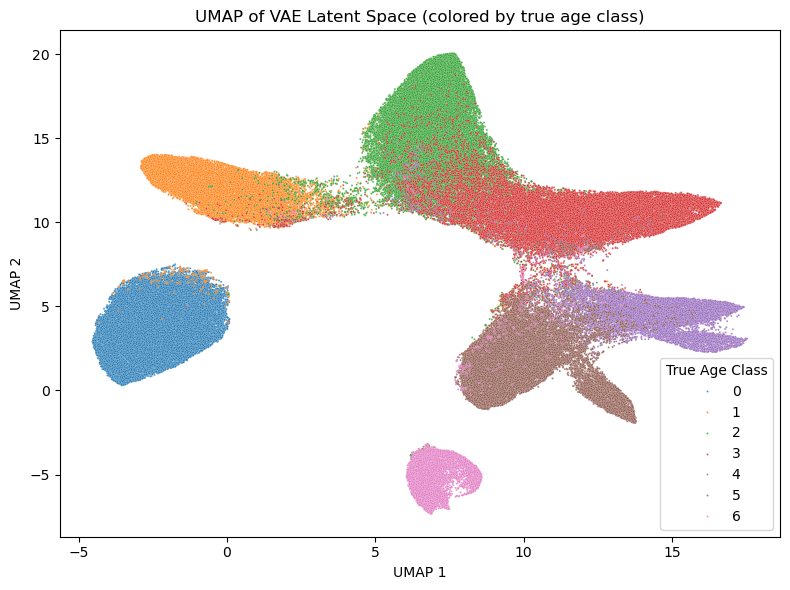

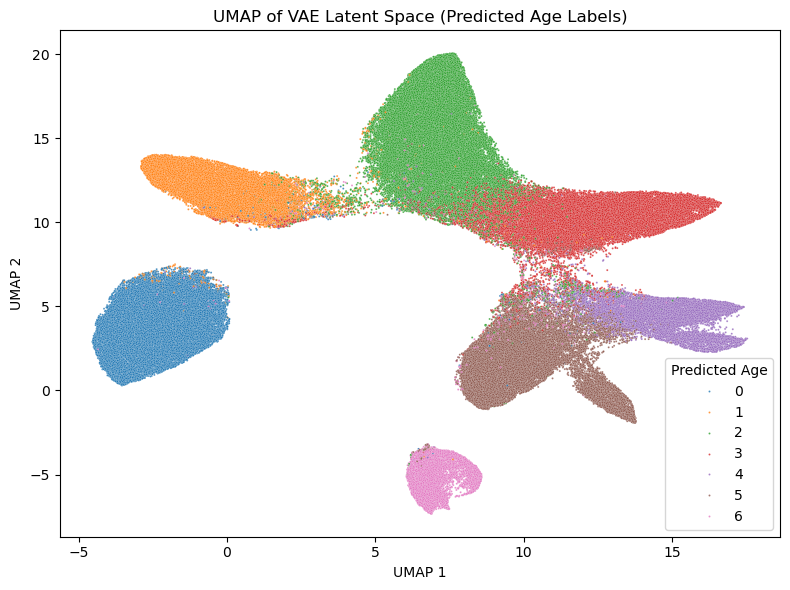

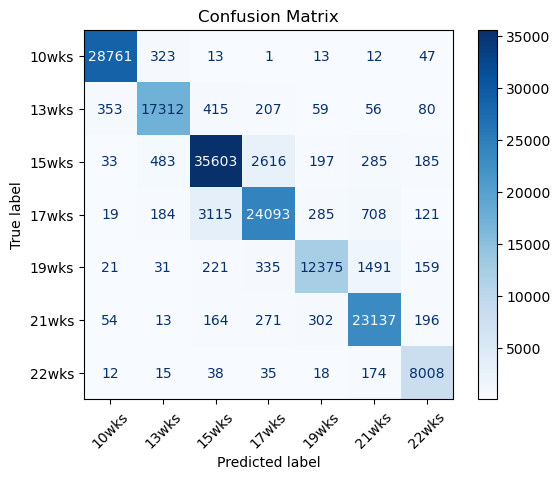

Test Accuracy: 0.9179


In [34]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x=latent_2d[:, 0], y=latent_2d[:, 1],
                hue=all_labels, palette="tab10", s=2, alpha=0.8)
plt.title("UMAP of VAE Latent Space (colored by true age class)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(title="True Age Class")
plt.tight_layout()
plt.show()


# Plot UMAP colored by predicted age class
plt.figure(figsize=(8, 6))
sns.scatterplot(x=latent_2d[:, 0], y=latent_2d[:, 1],
                hue=all_preds, palette="tab10", s=2, alpha=0.8)
plt.title("UMAP of VAE Latent Space (Predicted Age Labels)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(title="Predicted Age")
plt.tight_layout()
plt.show()

# 2. Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=age_encoder.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

# 3. Accuracy Score
acc = accuracy_score(all_labels, all_preds)
print(f"Test Accuracy: {acc:.4f}")



In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Plot UMAP colored by true age class
plt.figure(figsize=(8, 6))
sns.scatterplot(x=latent_2d[:, 0], y=latent_2d[:, 1],
                hue=all_labels, palette="tab10", s=2, alpha=0.8)
plt.title("UMAP of VAE Latent Space (colored by true age class)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(title="True Age Class")
plt.tight_layout()
plt.savefig("umap_true_age.pdf")
plt.close()

# Plot UMAP colored by predicted age class
plt.figure(figsize=(8, 6))
sns.scatterplot(x=latent_2d[:, 0], y=latent_2d[:, 1],
                hue=all_preds, palette="tab10", s=2, alpha=0.8)
plt.title("UMAP of VAE Latent Space (Predicted Age Labels)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(title="Predicted Age")
plt.tight_layout()
plt.savefig("umap_predicted_age.pdf")
plt.close()

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=age_encoder.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.pdf")
plt.close()

# Accuracy Score
acc = accuracy_score(all_labels, all_preds)
print(f"Test Accuracy: {acc:.4f}")


Test Accuracy: 0.9179


In [37]:
import pandas as pd

# 1. Decode age class IDs back to actual age values
true_ages = age_encoder.inverse_transform(all_labels)
predicted_ages = age_encoder.inverse_transform(all_preds)

# 2. Get cell IDs from test AnnData
cell_ids = adata_test.obs_names.to_list()

# 3. Create a DataFrame
df_results = pd.DataFrame({
    "cell_id": cell_ids,
    "true_age": true_ages,
    "predicted_age": predicted_ages
})

# 4. Save to CSV
df_results.to_csv("cell_age_predictions.csv", index=False)


